Importing Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys

sys.path.append('../')
from Preprocessing import StandardScaler

Importing CSV Datasets

In [124]:
dataset = pd.read_csv("linear_regression_dataset.csv")

Cleaning Datasets

In [125]:
print(dataset.head())
print("Null datasets:\n",dataset.isnull().sum())
print("Duplicated sets: ",dataset.duplicated().sum())

   size_sqft  num_bedrooms  num_bathrooms  house_age          price
0       3974             1              2         30  157042.981704
1       1660             5              1         39   73536.696356
2       2094             5              2         35  159894.515969
3       1930             1              1         18  110310.067858
4       1895             5              3         42  125745.677119
Null datasets:
 size_sqft        0
num_bedrooms     0
num_bathrooms    0
house_age        0
price            0
dtype: int64
Duplicated sets:  0


Outliers

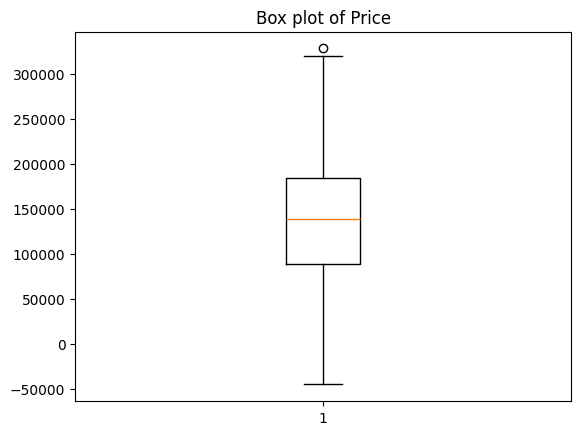

In [126]:
plt.boxplot(dataset['price'])
plt.title("Box plot of Price")
plt.show()

Removing Outliers

In [127]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)

#Inter-quartile Range
IQR = Q3-Q1


lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

Printing Results

In [128]:
print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

88340.98567042084
183821.9597255365
95480.97405511566
-54880.47541225265
327043.42080821


Scale Features

In [129]:
scaler = StandardScaler()
dataset[['size_sqft', 'house_age']]= scaler.fit_transform(dataset[['size_sqft', 'house_age']])

Storing the CSV

In [130]:
dataset.to_csv("cleaned_dataset.csv", index=False)


Importing the Linear Model Class

In [131]:
from LinearModels import LinearRegression

lr = LinearRegression(0.0,0.0)

Let's take some values

In [132]:
X = np.array(dataset['size_sqft'])
Y = np.array(dataset['price'])

Performing Linear Regression

In [133]:
w_final, b_final, J_cost, p_cost = lr.Gradient_Descent(X, Y, 0, 0, 1.0e-2, 11000)

Iterations     0: Cost: 2.32e+10  dj_dw: -4.281e+04, dj_sdb: -1.367e+05  w:  4.281e+02, b:  1.36735e+03 
Iterations  1100: Cost: 3.04e+09  dj_dw: -6.765e-01, dj_sdb: -2.161e+00  w:  4.281e+04, b:  1.36733e+05 
Iterations  2200: Cost: 3.04e+09  dj_dw: -1.069e-05, dj_sdb: -3.414e-05  w:  4.281e+04, b:  1.36735e+05 
Iterations  3300: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  4400: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  5500: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  6600: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  7700: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  8800: Cost: 3.04e+09  dj_dw: -3.627e-10, dj_sdb: -1.438e-09  w:  4.281e+04, b:  1.36735e+05 
Iterations  9900: Cost: 3.04e+09  dj_dw: -3.627e-10, dj

In [134]:
model = LinearRegression(w_final, b_final)
y_predict = model.LinearRegression(X)

Data Visualization

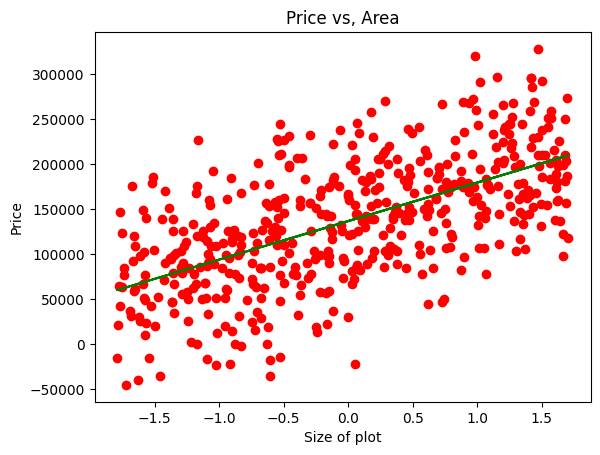

In [135]:
plt.scatter(X, Y, marker="o", c="r")
plt.plot(X, y_predict, c="g")
plt.xlabel("Size of plot")
plt.ylabel("Price")
plt.title("Price vs, Area")
plt.show()